# DATA EXPLORATAION

## Anzahl der Bilder:

In [2]:
import os
import random
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

In [4]:
# Definiere die Pfade zu deinen Unterordnern
real_images = './images/car/real'
fake_images = './images/car/fake'

# Definiere eine Funktion, um die Anzahl der Bilder in einem Ordner zu zählen
def zaehle_bilder(im_pfad):
    unterstuetzte_formate = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.svg')  # Erweiterbar
    anzahl = 0
    # Durchlaufe alle Dateien im angegebenen Pfad
    for datei in os.listdir(im_pfad):
        if datei.endswith(unterstuetzte_formate):
            anzahl += 1
    return anzahl

# Zähle die Bilder in beiden Unterordnern
bilder_in_unterordner1 = zaehle_bilder(unterordner1)
bilder_in_unterordner2 = zaehle_bilder(unterordner2)

In [5]:
real_images

8144

In [6]:
fake_images

6000

In [11]:
def plot_random_images_from_directory(directory, num_images=5):
    
    # Stelle sicher, dass die angegebene Anzahl von Bildern nicht größer ist als die Anzahl der Bilder im Verzeichnis
    num_images = min(num_images, len(os.listdir(directory)))

    # Wähle zufällige Bilder aus dem Verzeichnis
    random_images = random.sample(os.listdir(directory), num_images)

    # Erstelle einen Plot für die ausgewählten Bilder
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))
    
    if num_images == 1:
        axes = [axes]  # Damit `axes` immer iterierbar ist, auch wenn nur ein Bild geplottet wird

    for ax, image in zip(axes, random_images):
        img_path = os.path.join(directory, image)
        img = load_img(img_path)  # Lade Bild
        ax.imshow(img)  # Zeige Bild im Plot
        ax.axis('off')  # Entferne Achsenbeschriftungen
        ax.set_title(image)  # Setze den Bildnamen als Titel

    plt.tight_layout()
    plt.show()

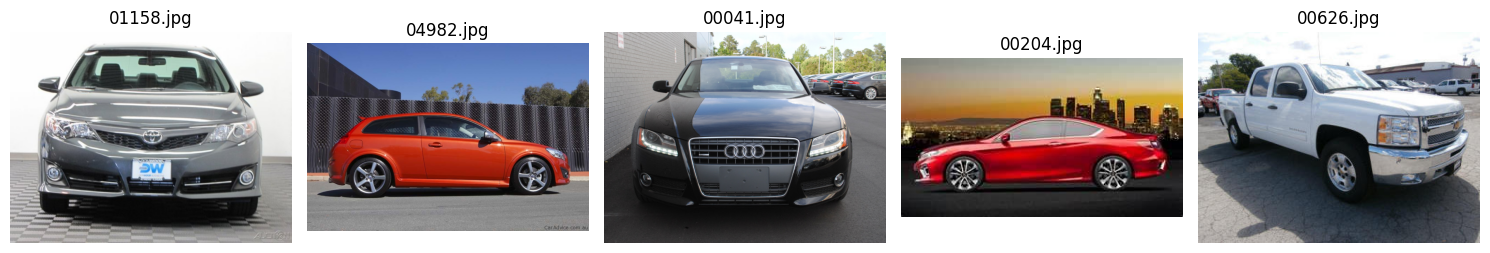

In [15]:
# Verwendung der Funktion
directory_path = './images/car/real'  # Setze den Pfad zu deinem Bildverzeichnis
plot_random_images_from_directory(directory_path, num_images=5)

In [2]:
# Verwendung der Funktion
directory_path = './images/car/fake'  # Setze den Pfad zu deinem Bildverzeichnis
plot_random_images_from_directory(directory_path, num_images=5)

NameError: name 'plot_random_images_from_directory' is not defined

In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Pfade zu den Ordnern, die die Bilder enthalten
real_image_folder = './images/car/real'
fake_image_folder = './images/car/fake'

# Zielgröße für die Skalierung der Bilder
target_size = (100, 100)  # Breite und Höhe in Pixel

def load_and_scale_images_with_labels(image_folder, label, target_size):
    labeled_images = []
    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Unterstützung für JPEG und PNG
            img_path = os.path.join(image_folder, filename)
            with Image.open(img_path) as img:
                img = img.convert('RGB')
                img = img.resize(target_size)
                labeled_images.append((np.array(img), label))
    return labeled_images

def cluster_images(labeled_images, n_clusters=5):
    # Bilder in eine Liste von Vektoren umwandeln und Labels extrahieren
    img_vectors = [img.reshape(-1, 3) for img, _ in labeled_images]  # Jedes Pixel wird zu einem 3D-Punkt (R, G, B)
    img_vectors = np.vstack(img_vectors)  # Stapelt die Vektoren aller Bilder zu einem großen Array

    # k-Means-Clustering durchführen
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(img_vectors)
    
    # Cluster-Zentren und Labels extrahieren
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_  # Jedes Pixel wird einem Cluster zugeordnet

    return cluster_centers, cluster_labels
    
def plot_clusters(centers, labels, cluster_labels):
    # Cluster-Zentren als Bilder darstellen
    plt.figure(figsize=(10, 10))
    for i, center in enumerate(centers):
        plt.subplot(1, len(centers), i+1)
        center_img = center.reshape(1, 1, 3).astype(np.uint8)
        plt.imshow(center_img)
        plt.title(f"Cluster {i+1}")
        plt.axis('off')
    plt.show()

# Bilder aus beiden Ordnern laden und mit Labels versehen
labeled_images = load_and_scale_images_with_labels(real_image_folder, 'real', target_size) + \
                 load_and_scale_images_with_labels(fake_image_folder, 'fake', target_size)

# Bilder clustern
cluster_centers, cluster_labels, labels = cluster_images(labeled_images, n_clusters=2)

# Cluster-Zentren plotten
plot_clusters(cluster_centers, labels, cluster_labels)


C:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: not enough values to unpack (expected 3, got 2)